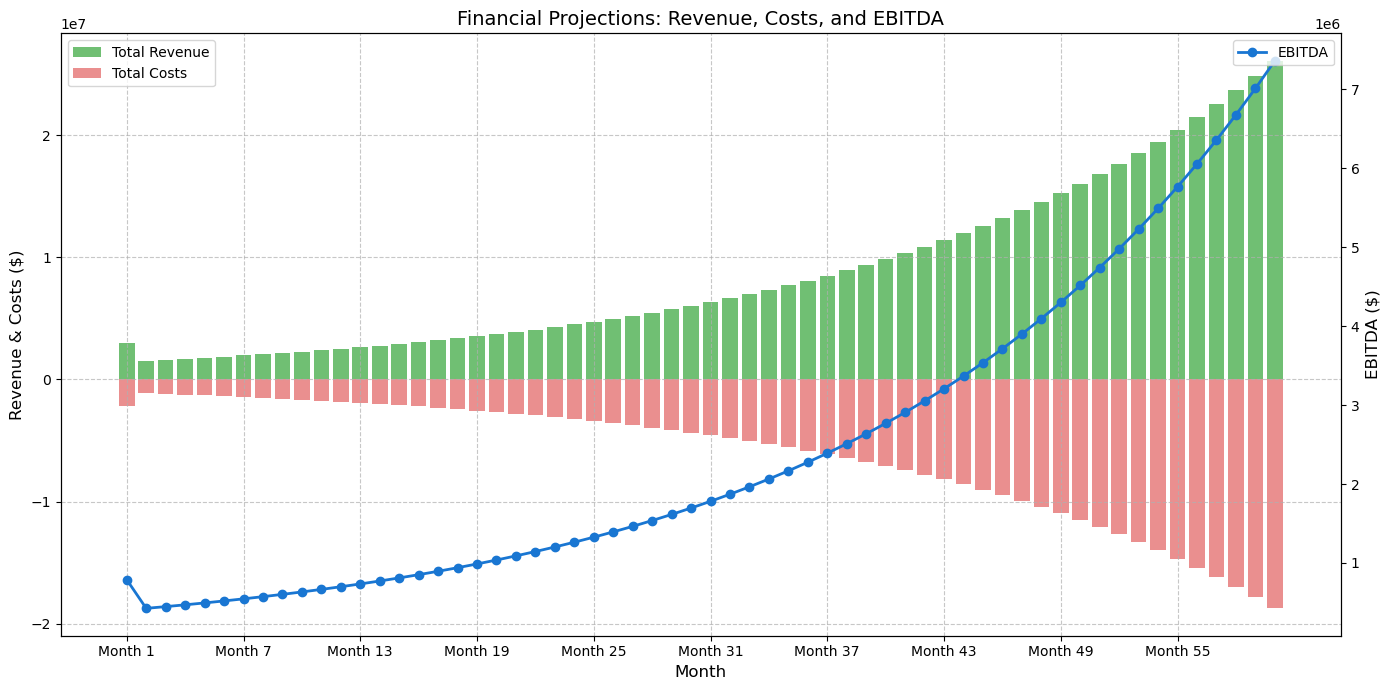

In [4]:
financial_df 

,Month,New Patients,Total Patients,Recurring Revenue,Non-Recurring Revenue,Total Revenue,Recurring Costs,Non-Recurring Costs,Total Costs,EBITDA,Cash Balance
0,1,6000,6000,1.468974e+06,1493700.0,2.962674e+06,330000.0,1110000.0,2.174000e+06,7.886740e+05,2.288674e+06
1,2,300,6300,1.542423e+06,0.0,1.542423e+06,346500.0,0.0,1.116700e+06,4.257227e+05,2.714397e+06
2,3,315,6615,1.619544e+06,0.0,1.619544e+06,363825.0,0.0,1.172035e+06,4.475088e+05,3.161906e+06
3,4,330,6945,1.700337e+06,0.0,1.700337e+06,381975.0,0.0,1.230005e+06,4.703324e+05,3.632238e+06
4,5,347,7292,1.785293e+06,0.0,1.785293e+06,401060.0,0.0,1.290961e+06,4.943317e+05,4.126570e+06
5,6,364,7656,1.874411e+06,0.0,1.874411e+06,421080.0,0.0,1.354904e+06,5.195068e+05,4.646076e+06
6,7,382,8038,1.967936e+06,0.0,1.967936e+06,442090.0,0.0,1.422009e+06,5.459268e+05,5.192003e+06
7,8,401,8439,2.066112e+06,0.0,2.066112e+06,464145.0,0.0,1.492451e+06,5.736609e+05,5.765664e+06
8,9,421,8860,2.169185e+06,0.0,2.169185e+06,487300.0,0.0,1.566407e+06,6.027783e+05,6.368443e+06
9,10,443,9303,2.277644e+06,0.0,2.277644e+06,511665.0,0.0,1.644227e+06,6.334172e+05,7.001860e+06


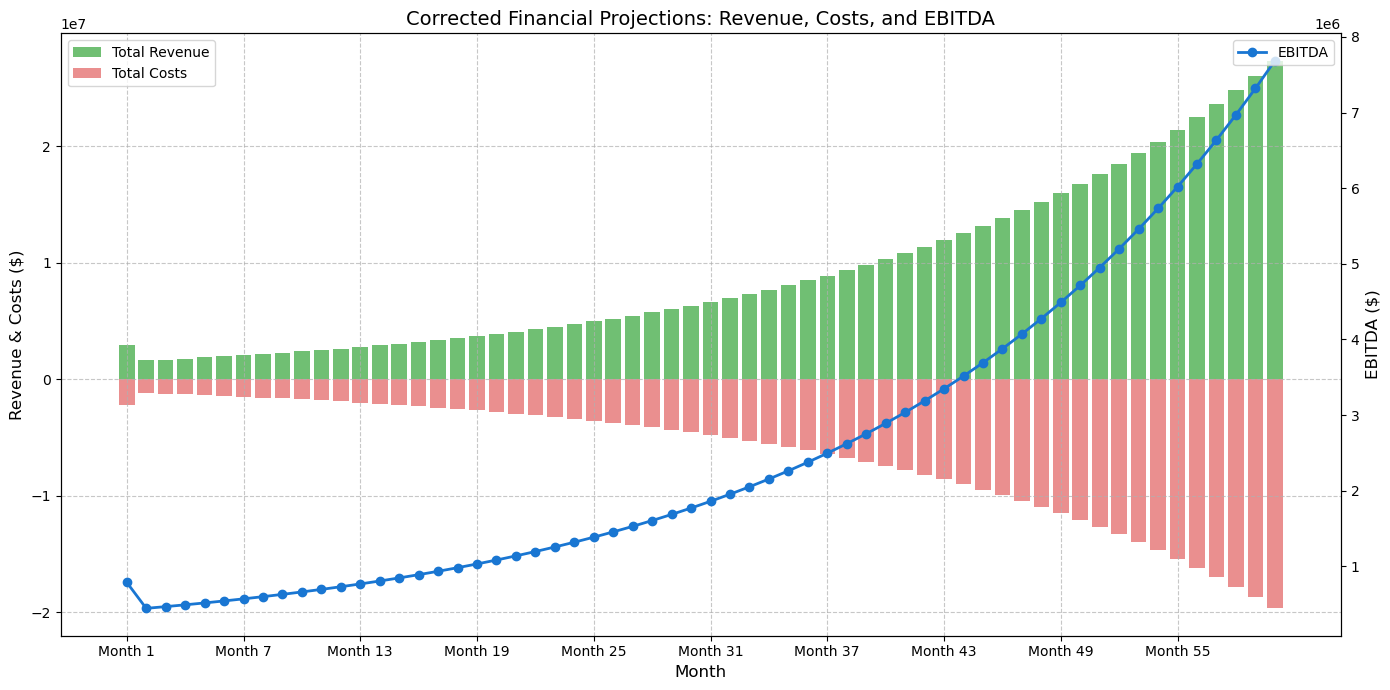

In [5]:
# Corrected Financial Model to Calculate Non-Recurring Revenue for New Patients Each Month

# Constants and Dynamic Variables
gpci_virginia = 1.0
patients_per_home = 150
nursing_homes_virginia = 40
monthly_growth_rate = 0.05
initial_cash = 1_500_000
months = 60

# Billing Code Revenue
recurring_revenue_per_patient = {
    "99454": 45.12,
    "99457": 46.85,
    "99458": 37.62,
    "99490": 59.90,
    "99491": 80.98 / 20,
    "99091": 51.29,
}

non_recurring_revenue_per_patient = {
    "99453": 18.95,
    "TCM": 230.00,
}

# Cost Assumptions
staffing_cost_per_patient = 50.00
platform_fee_per_patient = 5.00
hardware_cost_per_patient = 185.00
nurse_cost = 70_000 / 12 / 50
md_cost = 120_000 / 12 / (50 * 50)
operational_overhead = 10_000

# Initialize DataFrame
data = {"Month": [], "New Patients": [], "Total Patients": [], "Recurring Revenue": [],
        "Non-Recurring Revenue": [], "Total Revenue": [], "Recurring Costs": [],
        "Non-Recurring Costs": [], "Total Costs": [], "EBITDA": [], "Cash Balance": []}

# Initialize Variables
cash_balance = initial_cash
total_patients = 0

# Financial Model Logic
for month in range(1, months + 1):
    active_homes = int(nursing_homes_virginia * (1 + monthly_growth_rate) ** (month - 1))
    new_patients = active_homes * patients_per_home if month == 1 else int(total_patients * monthly_growth_rate)
    total_patients += new_patients

    # Revenue Calculation
    recurring_revenue = sum(recurring_revenue_per_patient.values()) * gpci_virginia * total_patients
    non_recurring_revenue = sum(non_recurring_revenue_per_patient.values()) * gpci_virginia * new_patients
    total_revenue = recurring_revenue + non_recurring_revenue

    # Cost Calculation
    recurring_cost = (staffing_cost_per_patient + platform_fee_per_patient) * total_patients
    nurse_md_cost = (nurse_cost + md_cost) * total_patients
    non_recurring_cost = hardware_cost_per_patient * new_patients
    total_costs = recurring_cost + nurse_md_cost + non_recurring_cost + operational_overhead

    # EBITDA and Cash Balance
    ebitda = total_revenue - total_costs
    cash_balance += ebitda

    # Store Data
    data["Month"].append(month)
    data["New Patients"].append(new_patients)
    data["Total Patients"].append(total_patients)
    data["Recurring Revenue"].append(recurring_revenue)
    data["Non-Recurring Revenue"].append(non_recurring_revenue)
    data["Total Revenue"].append(total_revenue)
    data["Recurring Costs"].append(recurring_cost)
    data["Non-Recurring Costs"].append(non_recurring_cost)
    data["Total Costs"].append(total_costs)
    data["EBITDA"].append(ebitda)
    data["Cash Balance"].append(cash_balance)

# Convert to DataFrame
financial_df = pd.DataFrame(data)

# Summarize by Month
monthly_summary = financial_df.groupby("Month").agg(
    Total_Revenue=("Total Revenue", "sum"),
    Total_Costs=("Total Costs", "sum"),
    Total_EBITDA=("EBITDA", "sum"),
    Cash_Balance=("Cash Balance", "last"),
).reset_index()

# Visualization
fig, ax1 = plt.subplots(figsize=(14, 7))

# Revenue and Costs Bar Chart
ax1.bar(monthly_summary["Month"], monthly_summary["Total_Revenue"], label="Total Revenue", color="#4caf50", alpha=0.8)
ax1.bar(monthly_summary["Month"], -monthly_summary["Total_Costs"], label="Total Costs", color="#e57373", alpha=0.8)

# EBITDA Line
ax2 = ax1.twinx()
ax2.plot(monthly_summary["Month"], monthly_summary["Total_EBITDA"], label="EBITDA", color="#1976d2", marker="o", linewidth=2)

# Labels and Formatting
ax1.set_xlabel("Month", fontsize=12)
ax1.set_ylabel("Revenue & Costs ($)", fontsize=12)
ax2.set_ylabel("EBITDA ($)", fontsize=12)
ax1.legend(loc="upper left", fontsize=10)
ax2.legend(loc="upper right", fontsize=10)
ax1.set_title("Corrected Financial Projections: Revenue, Costs, and EBITDA", fontsize=14)

# Grid and Layout Adjustments
ax1.grid(visible=True, linestyle='--', alpha=0.7)
plt.xticks(monthly_summary["Month"][::6], labels=[f"Month {x}" for x in monthly_summary["Month"][::6]], rotation=45)

plt.tight_layout()
plt.show()


In [6]:
financial_df


,Month,New Patients,Total Patients,Recurring Revenue,Non-Recurring Revenue,Total Revenue,Recurring Costs,Non-Recurring Costs,Total Costs,EBITDA,Cash Balance
0,1,6000,6000,1.468974e+06,1493700.00,2.962674e+06,330000.0,1110000.0,2.174000e+06,7.886740e+05,2.288674e+06
1,2,300,6300,1.542423e+06,74685.00,1.617108e+06,346500.0,55500.0,1.172200e+06,4.449077e+05,2.733582e+06
2,3,315,6615,1.619544e+06,78419.25,1.697963e+06,363825.0,58275.0,1.230310e+06,4.676531e+05,3.201235e+06
3,4,330,6945,1.700337e+06,82153.50,1.782491e+06,381975.0,61050.0,1.291055e+06,4.914359e+05,3.692671e+06
4,5,347,7292,1.785293e+06,86385.65,1.871679e+06,401060.0,64195.0,1.355156e+06,5.165224e+05,4.209193e+06
5,6,364,7656,1.874411e+06,90617.80,1.965029e+06,421080.0,67340.0,1.422244e+06,5.427846e+05,4.751978e+06
6,7,382,8038,1.967936e+06,95098.90,2.063034e+06,442090.0,70670.0,1.492679e+06,5.703557e+05,5.322333e+06
7,8,401,8439,2.066112e+06,99828.95,2.165941e+06,464145.0,74185.0,1.566636e+06,5.993049e+05,5.921638e+06
8,9,421,8860,2.169185e+06,104807.95,2.273993e+06,487300.0,77885.0,1.644292e+06,6.297012e+05,6.551340e+06
9,10,443,9303,2.277644e+06,110284.85,2.387929e+06,511665.0,81955.0,1.726182e+06,6.617470e+05,7.213087e+06


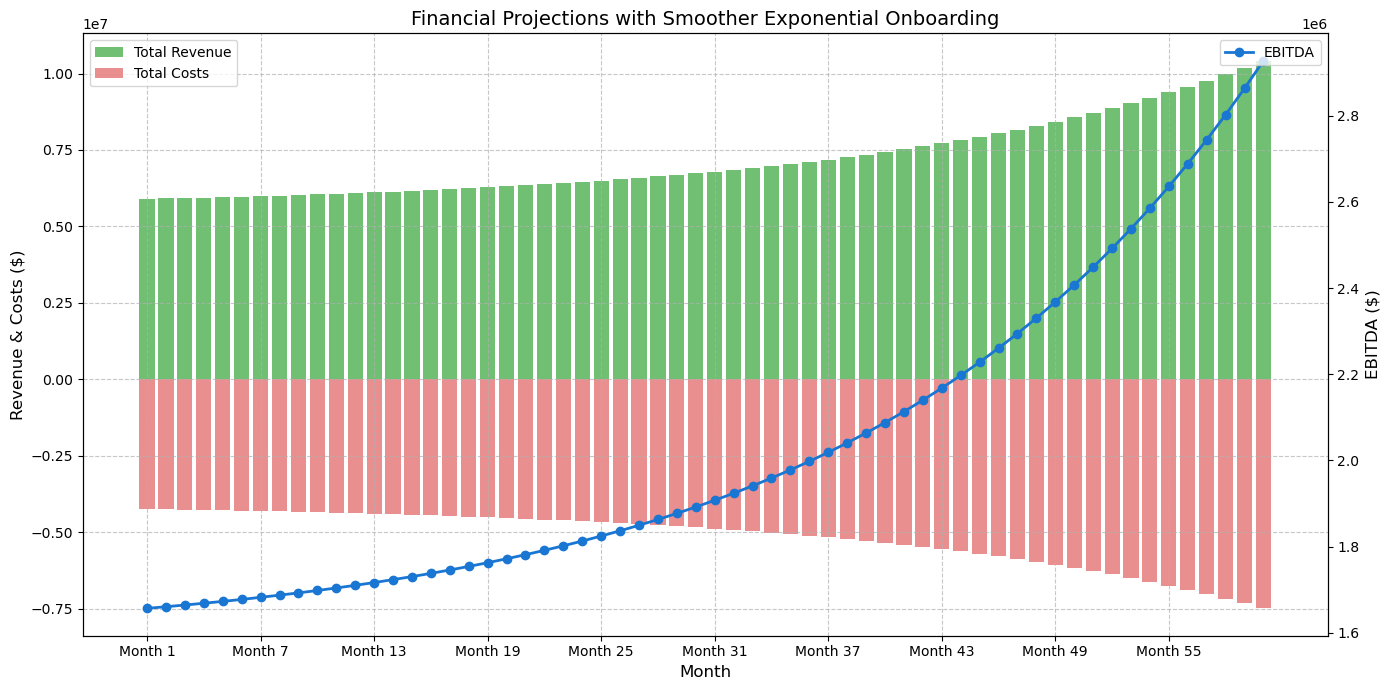

In [7]:
# Smoother Onboarding with Exponential Growth

# Constants and Dynamic Variables
gpci_virginia = 1.0
patients_per_home = 600  # Initial number of patients per nursing home
nursing_homes_virginia = 40  # Starting number of nursing homes
initial_cash = 1_500_000
months = 60
onboarding_growth_rate = 0.05  # Monthly growth rate for new patients

# Billing Code Revenue
recurring_revenue_per_patient = {
    "99454": 45.12,
    "99457": 46.85,
    "99458": 37.62,
    "99490": 59.90,
    "99491": 80.98 / 20,
    "99091": 51.29,
}

non_recurring_revenue_per_patient = {
    "99453": 18.95,
    "TCM": 230.00,
}

# Cost Assumptions
staffing_cost_per_patient = 50.00
platform_fee_per_patient = 5.00
hardware_cost_per_patient = 185.00
nurse_cost = 70_000 / 12 / 50
md_cost = 120_000 / 12 / (50 * 50)
operational_overhead = 10_000

# Initialize DataFrame
data = {"Month": [], "New Patients": [], "Total Patients": [], "Recurring Revenue": [],
        "Non-Recurring Revenue": [], "Total Revenue": [], "Recurring Costs": [],
        "Non-Recurring Costs": [], "Total Costs": [], "EBITDA": [], "Cash Balance": []}

# Initialize Variables
cash_balance = initial_cash
total_patients = nursing_homes_virginia * patients_per_home  # Initial number of patients
new_patients = 50  # Starting monthly onboarding

# Financial Model Logic
for month in range(1, months + 1):
    # Calculate new patients based on exponential growth
    new_patients = int(50 * (1 + onboarding_growth_rate) ** (month - 1))
    total_patients += new_patients

    # Revenue Calculation
    recurring_revenue = sum(recurring_revenue_per_patient.values()) * gpci_virginia * total_patients
    non_recurring_revenue = sum(non_recurring_revenue_per_patient.values()) * gpci_virginia * new_patients
    total_revenue = recurring_revenue + non_recurring_revenue

    # Cost Calculation
    recurring_cost = (staffing_cost_per_patient + platform_fee_per_patient) * total_patients
    nurse_md_cost = (nurse_cost + md_cost) * total_patients
    non_recurring_cost = hardware_cost_per_patient * new_patients
    total_costs = recurring_cost + nurse_md_cost + non_recurring_cost + operational_overhead

    # EBITDA and Cash Balance
    ebitda = total_revenue - total_costs
    cash_balance += ebitda

    # Store Data
    data["Month"].append(month)
    data["New Patients"].append(new_patients)
    data["Total Patients"].append(total_patients)
    data["Recurring Revenue"].append(recurring_revenue)
    data["Non-Recurring Revenue"].append(non_recurring_revenue)
    data["Total Revenue"].append(total_revenue)
    data["Recurring Costs"].append(recurring_cost)
    data["Non-Recurring Costs"].append(non_recurring_cost)
    data["Total Costs"].append(total_costs)
    data["EBITDA"].append(ebitda)
    data["Cash Balance"].append(cash_balance)

# Convert to DataFrame
financial_df = pd.DataFrame(data)

# Summarize by Month
monthly_summary = financial_df.groupby("Month").agg(
    Total_Revenue=("Total Revenue", "sum"),
    Total_Costs=("Total Costs", "sum"),
    Total_EBITDA=("EBITDA", "sum"),
    Cash_Balance=("Cash Balance", "last"),
).reset_index()

# Visualization
fig, ax1 = plt.subplots(figsize=(14, 7))

# Revenue and Costs Bar Chart
ax1.bar(monthly_summary["Month"], monthly_summary["Total_Revenue"], label="Total Revenue", color="#4caf50", alpha=0.8)
ax1.bar(monthly_summary["Month"], -monthly_summary["Total_Costs"], label="Total Costs", color="#e57373", alpha=0.8)

# EBITDA Line
ax2 = ax1.twinx()
ax2.plot(monthly_summary["Month"], monthly_summary["Total_EBITDA"], label="EBITDA", color="#1976d2", marker="o", linewidth=2)

# Labels and Formatting
ax1.set_xlabel("Month", fontsize=12)
ax1.set_ylabel("Revenue & Costs ($)", fontsize=12)
ax2.set_ylabel("EBITDA ($)", fontsize=12)
ax1.legend(loc="upper left", fontsize=10)
ax2.legend(loc="upper right", fontsize=10)
ax1.set_title("Financial Projections with Smoother Exponential Onboarding", fontsize=14)

# Grid and Layout Adjustments
ax1.grid(visible=True, linestyle='--', alpha=0.7)
plt.xticks(monthly_summary["Month"][::6], labels=[f"Month {x}" for x in monthly_summary["Month"][::6]], rotation=45)

plt.tight_layout()
plt.show()


NameError: name 'monthly_summary' is not defined

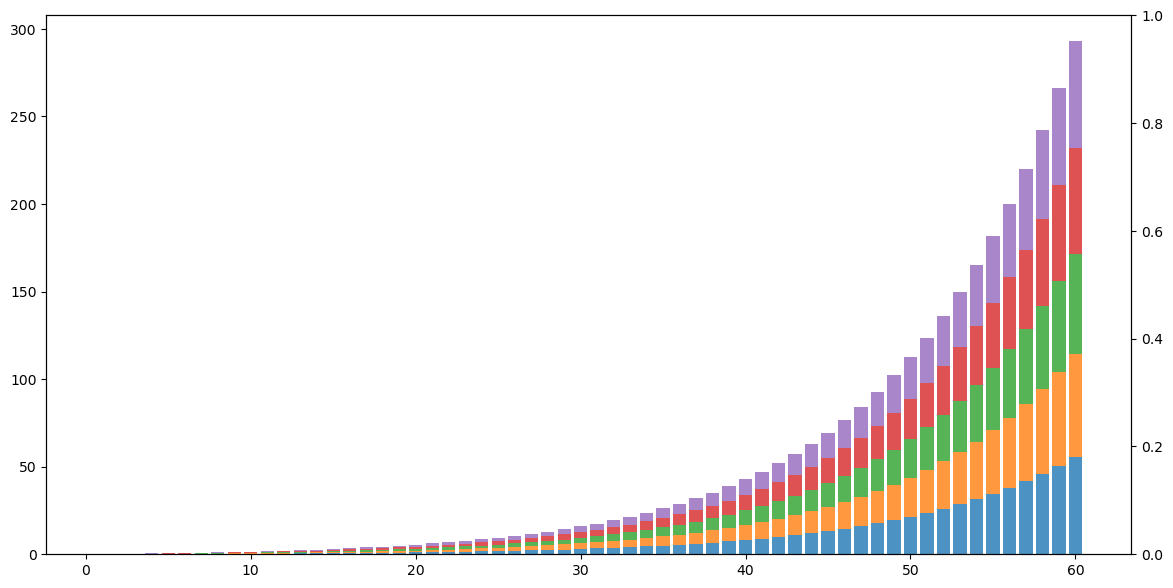

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Constants and Dynamic Variables
states = ["Virginia", "Florida", "Texas", "New York", "California"]
gpci_adjustments = {"Virginia": 1.0, "Florida": 1.05, "Texas": 1.03, "New York": 1.08, "California": 1.1}
initial_patients = 75
nursing_homes_per_state = 50
initial_cash = 1_500_000
monthly_growth_rate = 0.10  # Growth rate for new patients
months = 60  # 5 years

# Billing Code Revenue
recurring_revenue_per_patient = {
    "99454": 45.12,
    "99457": 46.85,
    "99458": 37.62,
    "99490": 59.90,
    "99491": 80.98 / 20,
    "99091": 51.29,
}

non_recurring_revenue_per_patient = {å
    "99453": 18.95,
    "TCM": 230.00,
}

# Cost Assumptions
staffing_cost_per_patient = 50.00
platform_fee_per_patient = 5.00
hardware_cost_per_patient = 185.00
nurse_cost = 70_000 / 12 / 50
md_cost = 120_000 / 12 / (50 * 50)
operational_overhead = 10_000

# Initialize DataFrame
data = {
    "Month": [],
    "State": [],
    "New Patients": [],
    "Total Patients": [],
    "Recurring Revenue": [],
    "Non-Recurring Revenue": [],
    "Total Revenue": [],
    "Recurring Costs": [],
    "Non-Recurring Costs": [],
    "Total Costs": [],
    "EBITDA": [],
    "Cash Balance": [],
}

# Initialize Variables
cash_balance = initial_cash
total_patients = {state: 0 for state in states}

# Financial Model Logic
for month in range(1, months + 1):
    monthly_revenue = 0
    monthly_costs = 0
    monthly_recurring_revenue = 0
    monthly_non_recurring_revenue = 0

    for state in states:
        gpci = gpci_adjustments[state]

        # New Patients Growth
        new_patients = int(initial_patients * (1 + monthly_growth_rate) ** (month - 1))
        total_patients[state] += new_patients

        # Revenue Calculation
        recurring_revenue = sum(recurring_revenue_per_patient.values()) * gpci * total_patients[state]
        non_recurring_revenue = (
            sum(non_recurring_revenue_per_patient.values()) * gpci * new_patients if month == 1 else 0
        )
        monthly_recurring_revenue += recurring_revenue
        monthly_non_recurring_revenue += non_recurring_revenue
        total_revenue = recurring_revenue + non_recurring_revenue

        # Cost Calculation
        recurring_cost = (staffing_cost_per_patient + platform_fee_per_patient) * total_patients[state]
        nurse_md_cost = (nurse_cost + md_cost) * total_patients[state]
        non_recurring_cost = hardware_cost_per_patient * new_patients
        total_costs = recurring_cost + nurse_md_cost + non_recurring_cost + operational_overhead

        # EBITDA Calculation
        ebitda = total_revenue - total_costs
        cash_balance += ebitda

        # Store Data
        data["Month"].append(month)
        data["State"].append(state)
        data["New Patients"].append(new_patients)
        data["Total Patients"].append(total_patients[state])
        data["Recurring Revenue"].append(recurring_revenue)
        data["Non-Recurring Revenue"].append(non_recurring_revenue)
        data["Total Revenue"].append(total_revenue)
        data["Recurring Costs"].append(recurring_cost)
        data["Non-Recurring Costs"].append(non_recurring_cost)
        data["Total Costs"].append(total_costs)
        data["EBITDA"].append(ebitda)
        data["Cash Balance"].append(cash_balance)

# Convert to DataFrame
financial_df = pd.DataFrame(data)
# Summarize by Month and State
state_summary = financial_df.groupby(["Month", "State"]).agg(
    Total_Revenue=("Total Revenue", "sum"),
    Total_Costs=("Total Costs", "sum"),
    Total_EBITDA=("EBITDA", "sum"),
).reset_index()

# Pivot for Stacked Bar Chart
revenue_by_state = state_summary.pivot(index="Month", columns="State", values="Total_Revenue").fillna(0)

# Visualization: Revenue by State
fig, ax1 = plt.subplots(figsize=(14, 7))

# Stacked Revenue Bars
for state in states:
    ax1.bar(
        revenue_by_state.index,
        revenue_by_state[state] / 1_000_000,
        label=f"{state} Revenue",
        bottom=revenue_by_state[states[:states.index(state)]].sum(axis=1) / 1_000_000,
        alpha=0.8
    )

# Overlay EBITDA Line
ax2 = ax1.twinx()
ax2.plot(
    monthly_summary["Month"],
    monthly_summary["Total_EBITDA"] / 1_000_000,
    label="EBITDA",
    color="#1976d2",
    marker="o",
    linewidth=2,
)

# Labels and Formatting
ax1.set_xlabel("Month", fontsize=12)
ax1.set_ylabel("Revenue by State (in Millions)", fontsize=12)
ax2.set_ylabel("EBITDA (in Millions)", fontsize=12)
ax1.legend(loc="upper left", fontsize=10)
ax2.legend(loc="upper right", fontsize=10)
ax1.set_title("Revenue Breakdown by State with EBITDA Overlay", fontsize=14)

# Grid and Layout Adjustments
ax1.grid(visible=True, linestyle="--", alpha=0.7)
plt.xticks(monthly_summary["Month"][::6], labels=[f"Month {x}" for x in monthly_summary["Month"][::6]], rotation=45)

plt.tight_layout()
plt.show()


In [1]:
financial_df

NameError: name 'financial_df' is not defined

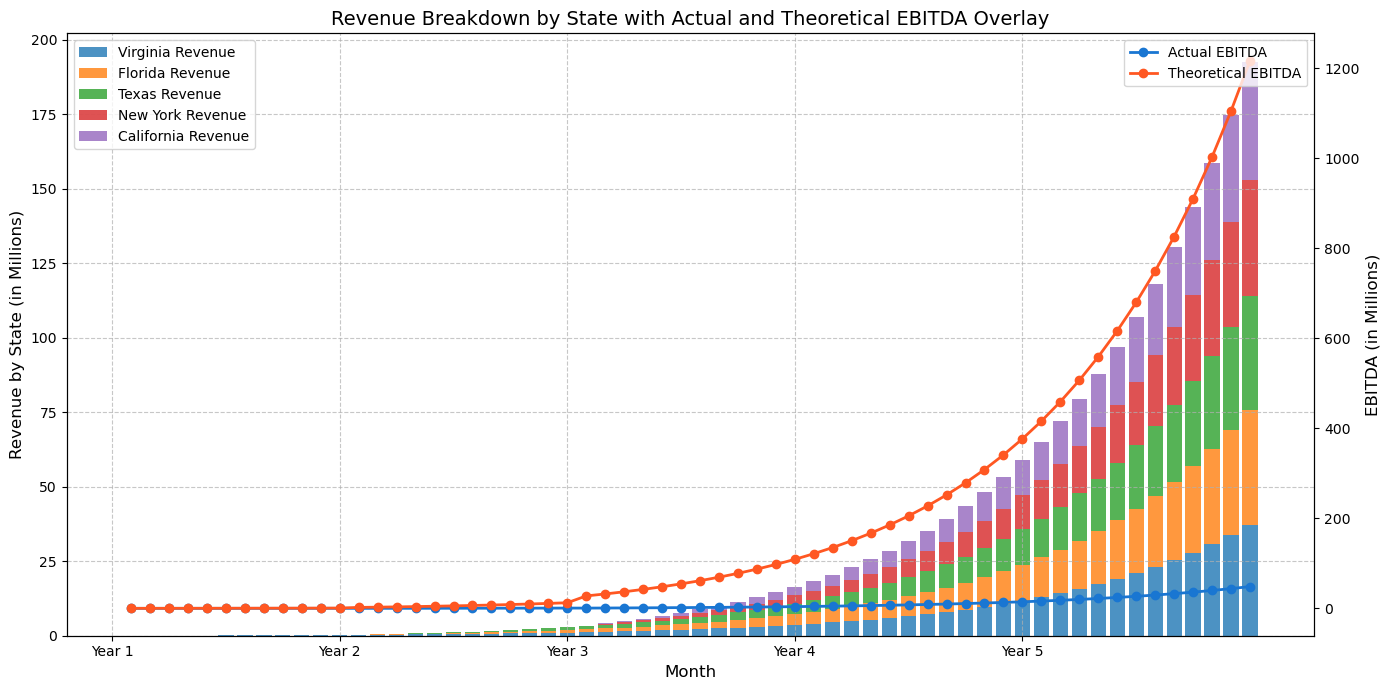

,Month,State,New Patients,Total Patients,Recurring Revenue,Non-Recurring Revenue,Theoretical Revenue,Total Revenue,Recurring Costs,Non-Recurring Costs,Total Costs,Actual EBITDA,Theoretical EBITDA,Cash Balance
0,1,Virginia,50,50,1.224145e+04,12447.5,25000.0,2.468895e+04,2750.0,9250.0,2.803333e+04,-3.344383e+03,2.165562e+04,1.496656e+06
1,2,Virginia,55,105,2.570705e+04,0.0,52500.0,2.570705e+04,5775.0,10175.0,3.862000e+04,-1.291295e+04,3.958704e+04,1.483743e+06
2,3,Virginia,60,165,4.039679e+04,0.0,82500.0,4.039679e+04,9075.0,11100.0,5.008500e+04,-9.688215e+03,7.281179e+04,1.474054e+06
3,4,Virginia,66,231,5.655550e+04,0.0,115500.0,5.655550e+04,12705.0,12210.0,6.278900e+04,-6.233501e+03,1.092665e+05,1.467821e+06
4,5,Virginia,73,304,7.442802e+04,0.0,152000.0,7.442802e+04,16720.0,13505.0,7.690767e+04,-2.479651e+03,1.495203e+05,1.465341e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,60,Virginia,13840,151711,3.714325e+07,0.0,75855500.0,3.714325e+07,8344105.0,2560400.0,2.922097e+07,7.922287e+06,8.377779e+07,4.467506e+08
224,60,Florida,13840,150647,3.872689e+07,0.0,79089675.0,3.872689e+07,8285585.0,2560400.0,2.903406e+07,9.692836e+06,1.646380e+08,4.564434e+08
225,60,Texas,13840,150647,3.798924e+07,0.0,77583205.0,3.798924e+07,8285585.0,2560400.0,2.903406e+07,8.955181e+06,2.414836e+08,4.653986e+08
226,60,New York,13840,147299,3.894811e+07,0.0,79541460.0,3.894811e+07,8101445.0,2560400.0,2.844592e+07,1.050219e+07,3.225720e+08,4.759008e+08


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Constants and Dynamic Variables
states = ["Virginia", "Florida", "Texas", "New York", "California"]
gpci_adjustments = {"Virginia": 1.0, "Florida": 1.05, "Texas": 1.03, "New York": 1.08, "California": 1.1}
initial_patients_per_month = 50  # Initial monthly onboarding per state
initial_nursing_homes = {"Virginia": 40, "Florida": 50, "Texas": 60, "New York": 30, "California": 70}
home_growth_rate = 0.05  # Annual growth rate of nursing homes
monthly_patient_growth_rate = 0.10  # Monthly growth rate for new patients
months = 60  # 5 years
initial_cash = 1_500_000

# Billing Code Revenue
recurring_revenue_per_patient = {
    "99454": 45.12,
    "99457": 46.85,
    "99458": 37.62,
    "99490": 59.90,
    "99491": 80.98 / 20,
    "99091": 51.29,
}

non_recurring_revenue_per_patient = {
    "99453": 18.95,
    "TCM": 230.00,
}

theoretical_billing_codes = {
    "Alzheimer's Monitoring": 180.00,
    "Mental Health Support": 120.00,
    "Preventive Care": 200.00,
}

# Cost Assumptions
staffing_cost_per_patient = 50.00
platform_fee_per_patient = 5.00
hardware_cost_per_patient = 185.00
nurse_cost = 70_000 / 12 / 50
md_cost = 120_000 / 12 / (50 * 50)
operational_overhead = 10_000

# Initialize DataFrame
data = {
    "Month": [],
    "State": [],
    "New Patients": [],
    "Total Patients": [],
    "Recurring Revenue": [],
    "Non-Recurring Revenue": [],
    "Theoretical Revenue": [],
    "Total Revenue": [],
    "Recurring Costs": [],
    "Non-Recurring Costs": [],
    "Total Costs": [],
    "Actual EBITDA": [],
    "Theoretical EBITDA": [],
    "Cash Balance": [],
}

# Initialize Variables
cash_balance = initial_cash
total_patients = {state: 0 for state in states}

# Financial Model Logic
for month in range(1, months + 1):
    monthly_revenue = 0
    monthly_costs = 0
    monthly_recurring_revenue = 0
    monthly_non_recurring_revenue = 0
    monthly_theoretical_revenue = 0

    # Determine active states based on year
    if month <= 12:
        active_states = ["Virginia"]
    elif month <= 24:
        active_states = ["Virginia", "Florida", "Texas"]
    else:
        active_states = ["Virginia", "Florida", "Texas", "New York", "California"]

    for state in active_states:
        gpci = gpci_adjustments[state]

        # New Patients Growth
        new_patients = int(
            initial_patients_per_month * (1 + monthly_patient_growth_rate) ** (month - 1)
        )
        total_patients[state] += new_patients

        # Revenue Calculation
        recurring_revenue = sum(recurring_revenue_per_patient.values()) * gpci * total_patients[state]
        non_recurring_revenue = (
            sum(non_recurring_revenue_per_patient.values()) * gpci * new_patients if month == 1 else 0
        )
        theoretical_revenue = sum(theoretical_billing_codes.values()) * gpci * total_patients[state]
        monthly_recurring_revenue += recurring_revenue
        monthly_non_recurring_revenue += non_recurring_revenue
        monthly_theoretical_revenue += theoretical_revenue
        total_revenue = recurring_revenue + non_recurring_revenue

        # Cost Calculation
        recurring_cost = (staffing_cost_per_patient + platform_fee_per_patient) * total_patients[state]
        nurse_md_cost = (nurse_cost + md_cost) * total_patients[state]
        non_recurring_cost = hardware_cost_per_patient * new_patients
        total_costs = recurring_cost + nurse_md_cost + non_recurring_cost + operational_overhead

        # EBITDA Calculation
        actual_ebitda = total_revenue - total_costs
        theoretical_ebitda = total_revenue + monthly_theoretical_revenue - total_costs
        cash_balance += actual_ebitda

        # Store Data
        data["Month"].append(month)
        data["State"].append(state)
        data["New Patients"].append(new_patients)
        data["Total Patients"].append(total_patients[state])
        data["Recurring Revenue"].append(recurring_revenue)
        data["Non-Recurring Revenue"].append(non_recurring_revenue)
        data["Theoretical Revenue"].append(theoretical_revenue)
        data["Total Revenue"].append(total_revenue)
        data["Recurring Costs"].append(recurring_cost)
        data["Non-Recurring Costs"].append(non_recurring_cost)
        data["Total Costs"].append(total_costs)
        data["Actual EBITDA"].append(actual_ebitda)
        data["Theoretical EBITDA"].append(theoretical_ebitda)
        data["Cash Balance"].append(cash_balance)

# Convert to DataFrame
financial_df = pd.DataFrame(data)

# Summarize by Month and State
state_summary = financial_df.groupby(["Month", "State"]).agg(
    Total_Revenue=("Total Revenue", "sum"),
    Total_Costs=("Total Costs", "sum"),
    Total_EBITDA=("Actual EBITDA", "sum"),
    Total_Theoretical_EBITDA=("Theoretical EBITDA", "sum"),
).reset_index()

# Visualization: Revenue Breakdown by State
fig, ax1 = plt.subplots(figsize=(14, 7))

# Stacked Revenue Bars
revenue_by_state = state_summary.pivot(index="Month", columns="State", values="Total_Revenue").fillna(0)
for state in states:
    ax1.bar(
        revenue_by_state.index,
        revenue_by_state[state] / 1_000_000,
        label=f"{state} Revenue",
        bottom=revenue_by_state[states[:states.index(state)]].sum(axis=1) / 1_000_000,
        alpha=0.8,
    )

# Overlay Actual and Theoretical EBITDA Lines
ax2 = ax1.twinx()
ax2.plot(
    state_summary["Month"].unique(),
    state_summary.groupby("Month")["Total_EBITDA"].sum() / 1_000_000,
    label="Actual EBITDA",
    color="#1976d2",
    marker="o",
    linewidth=2,
)
ax2.plot(
    state_summary["Month"].unique(),
    state_summary.groupby("Month")["Total_Theoretical_EBITDA"].sum() / 1_000_000,
    label="Theoretical EBITDA",
    color="#ff5722",
    marker="o",
    linewidth=2,
)

# Labels and Formatting
ax1.set_xlabel("Month", fontsize=12)
ax1.set_ylabel("Revenue by State (in Millions)", fontsize=12)
ax2.set_ylabel("EBITDA (in Millions)", fontsize=12)
ax1.legend(loc="upper left", fontsize=10)
ax2.legend(loc="upper right", fontsize=10)
ax1.set_title("Revenue Breakdown by State with Actual and Theoretical EBITDA Overlay", fontsize=14)

# Grid and Layout Adjustments
ax1.grid(visible=True, linestyle="--", alpha=0.7)

# Corrected x-ticks and labels for years
plt.xticks(range(0, months, 12), labels=[f"Year {i}" for i in range(1, months // 12 + 1)], rotation=45)

plt.tight_layout()
plt.show()

financial_df

In [17]:
financial_df.loc[financial_df[financial_df.Month ==30]]

ValueError: Cannot index with multidimensional key